**Gradient Descent**

The goal of the gradient descent is to minimise a given function which, in our case, is the loss function of the neural network. To achieve this goal, it performs two steps iteratively.
1. Compute the slope (gradient) that is the first-order derivative of the function at the current point
2. Move-in the opposite direction of the slope increase from the current point by the computed amount

So, the idea is to pass the training set through the hidden layers of the neural network and then update the parameters of the layers by computing the gradients using the training samples from the training dataset.

**Stochastic Gradient Descent**

In Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step. We do the following steps in one epoch for SGD:

1. Take an example
2. Feed it to Neural Network
3. Calculate it’s gradient
4. Use the gradient we calculated in step 3 to update the weights
5. Repeat steps 1–4 for all the examples in training dataset

Since we are considering just one example at a time the cost will fluctuate over the training examples and it will not necessarily decrease. But in the long run, you will see the cost decreasing with fluctuations.


**Mini Batch Gradient Descent**

Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw. So, after creating the mini-batches of fixed size, we do the following steps in one epoch:


1. Pick a mini-batch
2. Feed it to Neural Network
3. Calculate the mean gradient of the mini-batch
4. Use the mean gradient we calculated in step 3 to update the weights
5. Repeat steps 1–4 for the mini-batches we created



In [54]:
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import accuracy_score

#Loading Data

In [55]:
iris=load_iris()
X,y = iris['data'],iris['target']

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Visualize Data

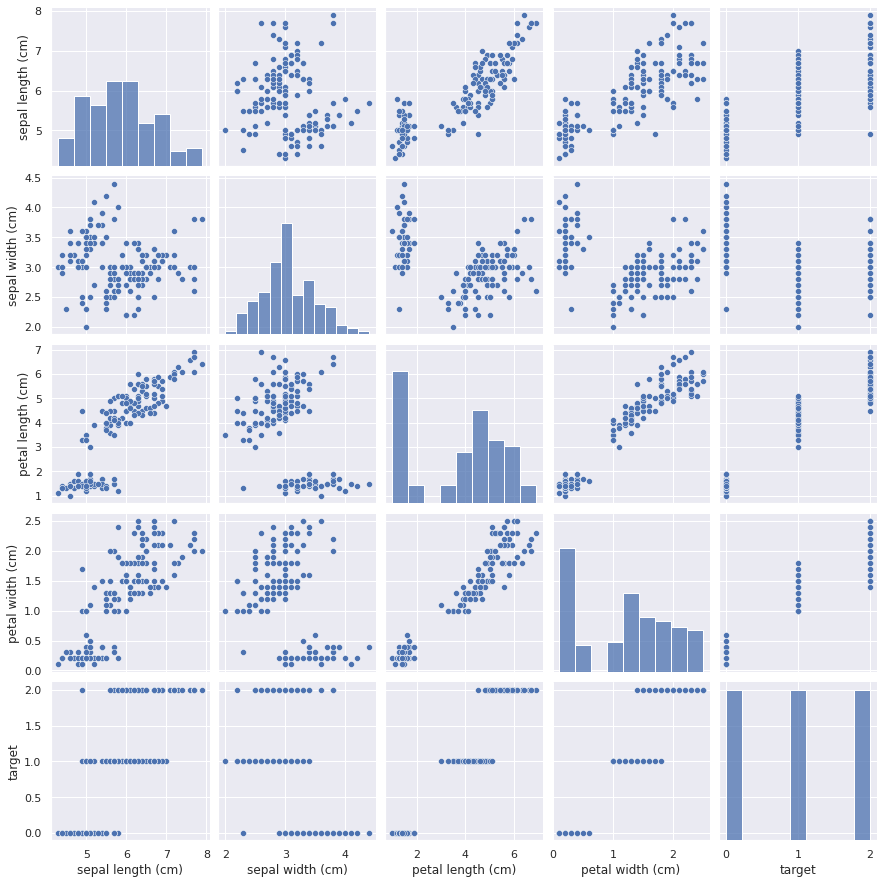

In [77]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
sns.set()
sns.pairplot(data)

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=35)
def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis=0,keepdims=True)

def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

def cost_function(a, y):
    m = y.shape[0]
    cost = -(1/m)*np.sum(y * np.log(a))
    return cost



#Single Layer Perceptron

In [58]:
def single_layer_perceptron(X, Y, learning_rate, epoch):
    cost = []
    
    n_x = X.shape[1]
    n_y = len(np.unique(Y))
    W = np.random.randn(n_y,n_x)
    
    Y = to_one_hot(Y)
    m = X.shape[1]
    

    for i in range(epoch):
        z = np.dot(W,X.T)
        a = softmax(z)
        loss = cost_function(a,Y.T)
        cost.append(loss)
        dz = a.T - Y
        dw = (1/m)*np.dot(X.T,dz)
        W = W - (learning_rate * dw.T)
    return W.T


**Result**

In [78]:
result = single_layer_perceptron(X_train,Y_train,learning_rate = 0.001, epoch = 10000)  

**Prediction using single layer perceptron**

In [59]:
prediction = np.dot(X_train,result)
prediction = np.argmax(prediction,axis=1)
print(prediction)

[2 0 2 2 1 2 1 1 1 0 1 1 1 0 1 0 2 0 2 1 1 0 0 2 2 1 1 0 0 1 0 1 0 0 1 0 2
 2 0 0 1 2 1 1 2 1 0 2 2 2 1 0 1 2 2 0 2 1 0 0 0 1 0 2 2 2 1 2 1 2 2 1 0 0
 1 2 1 2 1 0 1 0 2 1 0 2 0 2 0 1 0 0 2 0 2 2 1 1 1 2 1 2 2 0 0]


**Testing using single layer perceptron**

In [60]:
test = np.dot(X_test,result)
test = np.argmax(test,axis=1)
print(test)

[1 1 2 1 0 2 2 1 1 0 2 2 0 2 0 2 1 0 0 0 1 1 2 1 0 0 0 2 0 2 0 2 2 0 1 2 0
 2 2 2 1 0 0 1 2]


**Accuracy table**

In [61]:
training_accuracy = accuracy_score(Y_train,prediction)
test_accuracy = accuracy_score(Y_test,test)
x1=training_accuracy
y1=test_accuracy

In [62]:
from prettytable import PrettyTable
acc_table= PrettyTable(["training_accuracy using single layer perceptron", "test_accuracy using single layer perceptron"])
acc_table.add_row([training_accuracy,test_accuracy])
print(acc_table)



+-------------------------------------------------+---------------------------------------------+
| training_accuracy using single layer perceptron | test_accuracy using single layer perceptron |
+-------------------------------------------------+---------------------------------------------+
|                0.9809523809523809               |              0.9555555555555556             |
+-------------------------------------------------+---------------------------------------------+


#Single Layer Perceptron using Minibatch

In [63]:
def get_batches(X,Y,size,i):
    X_n = X[i:i+size,:]
    Y_n = Y[i:i+size]    
    return X_n, Y_n
def mini_batch_gd(X, Y, learning_rate, epoch, batch_size):
    num_batches = int(X.shape[0]/batch_size)    
    loss_mini = []
    
    n_x = X.shape[1]
    n_y = len(np.unique(Y))
    W = np.random.randn(n_y,n_x) * 0.01
    
    Y = to_one_hot(Y)
    m = X.shape[1]
    
    for batch in range(epoch):
        for batch_number in range(0,num_batches):
            X_batch, Y_batch = get_batches(X, Y, batch_size, batch_number)
            z = np.dot(W,X_batch.T)
            a = softmax(z)
            cost = cost_function(a,Y_batch.T)
            loss_mini.append(cost)
            dz = a.T - Y_batch 
            dw = (1/m)*np.dot(X_batch.T,dz)
            W = W - (learning_rate * dw.T)
    return W


**Result**

In [79]:
result = mini_batch_gd(X_train, Y_train, learning_rate=0.001, epoch= 10000, batch_size=12)

**Prediction using minibatch**

In [64]:
prediction = np.dot(X_train,result.T)
prediction = np.argmax(prediction,axis=1)
print(prediction)

[2 0 2 2 1 2 1 1 1 0 1 1 1 0 1 0 2 0 2 1 1 0 0 2 1 1 1 0 0 1 0 1 0 0 2 0 2
 2 0 0 1 2 1 1 2 1 0 2 2 2 1 1 1 2 2 0 2 1 0 0 0 1 0 2 2 2 1 2 1 2 2 1 0 0
 1 2 1 2 1 0 1 0 2 1 0 2 0 2 0 1 0 0 2 0 2 2 1 1 1 2 1 2 2 0 0]


**Testing using minibatch**

In [65]:
test = np.dot(X_test,result.T)
test = np.argmax(test,axis=1)
test

array([1, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1,
       2, 1, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 1,
       2])

**Accuracy table**

In [66]:
training_accuracy = accuracy_score(Y_train,prediction)
test_accuracy = accuracy_score(Y_test,test)
x2=training_accuracy
y2=test_accuracy

In [67]:
from prettytable import PrettyTable
acc_table= PrettyTable(["training_accuracy using mini batch gradiant", "test_accuracy using mini batch gradiant"])
acc_table.add_row([training_accuracy,test_accuracy])
print(acc_table)



+---------------------------------------------+-----------------------------------------+
| training_accuracy using mini batch gradiant | test_accuracy using mini batch gradiant |
+---------------------------------------------+-----------------------------------------+
|              0.9523809523809523             |            0.9333333333333333           |
+---------------------------------------------+-----------------------------------------+


#Stochastic Gradient Descent

In [68]:
def stochastic_gd(X, Y, learning_rate, epoch):
    loss = []
    
    n_x = X.shape[1]
    n_y = len(np.unique(Y))
    W = np.random.randn(n_y,n_x)
    
    Y = to_one_hot(Y)
    m = X.shape[1]
    
    for k in range(epoch):
        z = np.dot(W,X.T)
        a = softmax(z)
        cost = cost_function(a,Y.T)
        loss.append(cost)
        dz = a.T - Y
        dw = (1/m)*np.dot(X.T,dz)
        for k in range(1,m):
            W = W - (learning_rate * dw.T)*(X[k,:])
    return W.T


**Result**

In [69]:
result = stochastic_gd(X_train,Y_train,learning_rate = 0.001, epoch = 10000)
result

array([[ 3.89490341,  2.56512056, -3.88260091],
       [ 4.8429203 ,  1.18187998, -3.18545411],
       [-7.95557268, -0.20923556,  7.66324969],
       [-0.15346818, -4.63180257,  4.17620365]])

**Prediction using stochastic gradiant**

In [70]:
prediction= np.dot(X_train,result)
prediction= np.argmax(prediction,axis=1)
print(prediction)

[2 0 2 2 1 2 1 1 1 0 1 1 1 0 1 0 2 0 2 1 1 0 0 2 2 1 1 0 0 1 0 1 0 0 1 0 2
 2 0 0 1 2 1 1 2 1 0 2 2 2 1 0 1 2 2 0 2 1 0 0 0 1 0 2 2 2 1 2 2 2 2 1 0 0
 1 2 1 2 1 0 1 0 2 1 0 2 0 2 0 1 0 0 2 0 2 2 1 1 1 2 1 2 2 0 0]


**Testing using stochastic gradiant**

In [71]:
test = np.dot(X_test,result)
test = np.argmax(test,axis=1)
print(test)

[1 1 2 2 0 2 2 1 1 0 2 2 0 2 0 2 1 0 0 0 1 1 2 1 0 0 0 2 0 2 0 2 2 0 1 2 0
 2 2 2 1 0 0 1 2]


**Accurace table**

In [72]:
training_accuracy = accuracy_score(Y_train,prediction)
test_accuracy = accuracy_score(Y_test,test)
x3=training_accuracy
y3=test_accuracy

In [73]:
from prettytable import PrettyTable
acc_table= PrettyTable(["training_accuracy using stochastic gradiant", "test_accuracy using stochastic gradiant"])
acc_table.add_row([training_accuracy,test_accuracy])
print(acc_table)



+---------------------------------------------+-----------------------------------------+
| training_accuracy using stochastic gradiant | test_accuracy using stochastic gradiant |
+---------------------------------------------+-----------------------------------------+
|              0.9904761904761905             |            0.9333333333333333           |
+---------------------------------------------+-----------------------------------------+


#Comparison

In [76]:
from prettytable import PrettyTable
acc_table= PrettyTable(["#","Single Layer Perceptron", "with mini batch","with Stochastic Gradient Descent"])
acc_table.add_row(["Training Accuracy(%)",x1,x2,x3])
acc_table.add_row(["Testing Accuracy(%)",y1,y2,y3])
print(acc_table)




+----------------------+-------------------------+--------------------+----------------------------------+
|          #           | Single Layer Perceptron |  with mini batch   | with Stochastic Gradient Descent |
+----------------------+-------------------------+--------------------+----------------------------------+
| Training Accuracy(%) |    0.9809523809523809   | 0.9523809523809523 |        0.9904761904761905        |
| Testing Accuracy(%)  |    0.9555555555555556   | 0.9333333333333333 |        0.9333333333333333        |
+----------------------+-------------------------+--------------------+----------------------------------+


**Differences**

In gradient descent we use all the data in one time.Thats too much computation if there is a big dataset.On the other hand we use a selected batch to calculate the parametres.SGD is not so different it pick a random sample and using that it changes its parametres.Other than that almost all calculations are the same.But gradient descent fails in terms of big datset where we use mini batch gradient descent and SDG.